# Identifying Patient Cohorts in [MIMIC-II](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3124312/)


In [1]:
%matplotlib inline

In [2]:
import pymysql
import pandas as pd
import getpass
import pandas as pd
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt

In [3]:
conn = pymysql.connect(host="mysql",
                       port=3306,user="jovyan",
                       passwd=getpass.getpass("Enter MySQL passwd for jovyan"),db='mimic2')
cursor = conn.cursor()

Enter MySQL passwd for jovyan········


In [24]:
adm=pd.read_sql("""SELECT * FROM admissions""", conn)

## Exercise: Create a Histogram of the length of stay for subjects in the database

In [25]:
adm.head()

,hadm_id,subject_id,admit_dt,disch_dt
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00


In [31]:
adm["stay"]=adm.apply(lambda row:(row["disch_dt"]-row["admit_dt"]).total_seconds()/3600/24,axis=1)
adm.head()

,hadm_id,subject_id,admit_dt,disch_dt,stay
0,28766,56,2644-01-17 00:00:00,2644-01-23 00:00:00,6.0
1,2075,3,2682-09-07 00:00:00,2682-09-18 00:00:00,11.0
2,20666,21,3138-10-29 00:00:00,3138-11-11 00:00:00,13.0
3,20882,21,3139-03-19 00:00:00,3139-03-28 00:00:00,9.0
4,12532,12,2875-09-26 00:00:00,2875-10-09 00:00:00,13.0


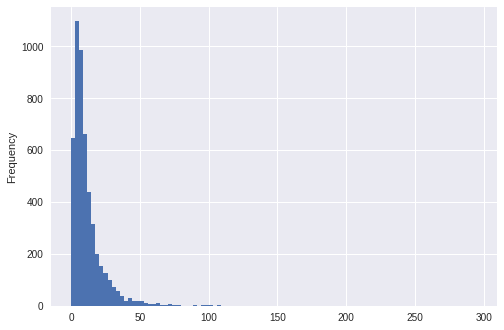

In [33]:
adm["stay"].plot.hist(bins=100)

## Exercise: Create a histogram of the day of the week when patients are admitted

In [34]:
import datetime
now=datetime.datetime.now()
print(now)

2017-07-07 20:42:31.392571


In [53]:
delta=adm["admit_dt"]-now
#print(delta)
adm["admit_dt"]+delta

TypeError: ufunc add cannot use operands with types dtype('O') and dtype('<m8[ns]')

In [48]:
adm["new"]=adm["admit_dt"].apply(lambda x: x-delta, axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'